# Analysis of Car Sales Ads


The objective of the project is to:

  * Perform Exploratory Analysis on the data for key insights
  * Analyze parameters and features of ads posted for different vehicles in a time period and check if any of this parameter significantly affects the price of the car. 

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import statistics

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

print('Libraries loaded successfully!')

Libraries loaded successfully!


### Data Check

In [2]:
# Load the data file into a DataFrame
data=pd.read_csv('vehicles_us.csv')
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
#number of missing data in each row
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
#check for duplicate rows
data.duplicated().sum()

0

In [6]:
# print the general/summary information about the DataFrame
data.describe(include='all')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [7]:
#Inspect categorical data entries
for col in ['condition', 'cylinders', 'fuel', 'transmission', 'type', 'paint_color', 'is_4wd']:
    print(col, data[col].unique())
    print('\n\n')

condition ['good' 'like new' 'fair' 'excellent' 'salvage' 'new']



cylinders [ 6.  4.  8. nan  5. 10.  3. 12.]



fuel ['gas' 'diesel' 'other' 'hybrid' 'electric']



transmission ['automatic' 'manual' 'other']



type ['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']



paint_color [nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']



is_4wd [ 1. nan]





From the data check we notice some data quality issues:
  * Missing data in columns; is_4wd, paint_color, odometer, cylinder and model year
  * Wrong data type for the date_posted and model_year column
  * No duplicate rows
  
The data will need preprocessing before further analysis

## Data Preprocessing

### Handling missing values

In [8]:
#percentage of missing data in each column

data.isna().mean()*100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [9]:
#is_4wd values
data['is_4wd'].unique()

array([ 1., nan])

In [10]:
#only one value '1'representing true. missing values indicate false. Filling missing values with 0
data['is_4wd']=data['is_4wd'].fillna(0)

Over 50% of our data has a missing data in the is_4wd column. This is a significant portion. We also noticed this is a binary representation of if the vehicle if a four wheel drive where 1 mean Yes and the missing value means no. 

Hence, replaced all missing values in this column with 0 for easier analyis.

In [11]:
#view sample of rows with missing data in model year
data[data['model_year'].isna()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,0.0,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,0.0,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


In [12]:
#handling missing value in model_year
# fill missing value in model_year with the median year based on the condition of the car
data['model_year']=data['model_year'].fillna(data.groupby('condition')['model_year'].transform('median'))

Over 7% of data missing in the model year column. The condition of the car is a logical predictor of the model year of the vehicle. Hence the missing values model year values were filled using the median year of the vehicle condition they fall under

In [13]:
#view sample row of missing value in odometer
data[data['odometer'].isna()].head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,0.0,2019-02-18,20
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,0.0,2019-03-08,29
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79


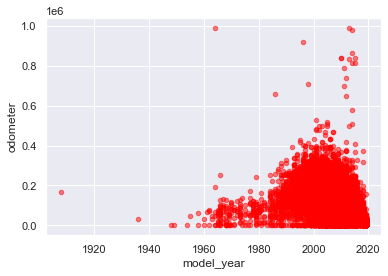

In [14]:
data.plot(kind='scatter', x='model_year', y='odometer', c='red', alpha=0.5)
plt.show()

In [15]:
data.corr()['odometer']

price         -0.420299
model_year    -0.462296
cylinders      0.090160
odometer       1.000000
is_4wd         0.036267
days_listed    0.003804
Name: odometer, dtype: float64

The plot shows a trend relationship between odometer and the model year of the vehicle. Hence the model year of the car will be used to estimate the odometer of the vehicle where missing.

The model year will be grouped into categories and the median of each category will be used to fill the missing values

In [16]:
#function to categorize year into 4 groups
def year_cat(year):
    if year < 1960:
        return 'super vintage'
    elif year< 1980:
        return 'vintage'
    elif year<2000:
        return 'old'
    else:
        return 'current'


In [17]:
#apply function to model_year
data['year_category']=data['model_year'].apply(year_cat)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,current
1,25500,2009.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,current
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,current
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9,current
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,current


In [18]:
#median odometer for each year category
data.groupby('year_category')['odometer'].median()

year_category
current          111526.0
old              165000.0
super vintage     17000.0
vintage           60005.0
Name: odometer, dtype: float64

In [19]:
#fill missing values in odometer with the median odometer value for that year category
data['odometer']=data['odometer'].fillna(data.groupby('year_category')['odometer'].transform('median'))

In [20]:
#view sample row of  missing values in paint color
data[data['paint_color'].isna()].head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,current
3,1500,2003.0,ford f-150,fair,8.0,gas,111526.0,automatic,pickup,NaN,0.0,2019-03-22,9,current
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,current
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,current
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8,current
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,111526.0,automatic,sedan,NaN,0.0,2018-07-26,43,current
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,0.0,2018-09-13,25,current
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,0.0,2018-06-04,121,current
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,0.0,2018-05-11,37,current
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22,current


In [21]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [22]:
#fill missing paint value with 'others'
data['paint_color']=data['paint_color'].fillna('others')

Missing values in paint color could be resulting from how data was collected. The missing data might represent other color not mentioned or listed during data collection. Represent all missing data in paint color with 'others' as this can not be estimated.

In [23]:
#view sample row of  missing values in cylinders
data[data['cylinders'].isna()].head(15)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,current
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,others,0.0,2018-05-05,22,current
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,others,0.0,2018-07-22,44,current
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2,current
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17,vintage
72,3650,2012.0,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,current
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,others,1.0,2018-10-30,3,current
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52,current
119,14800,2016.0,kia sorento,like new,NaN,gas,111526.0,automatic,SUV,brown,0.0,2019-02-27,93,current
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,111526.0,other,pickup,others,1.0,2018-08-31,44,current


In [24]:
def fill_odometer(df):
    '''
    This function takes the data frame as an argument and fills in missing values in the cylinder column
    using the cyliner mode value based on the model. 
    if no reported cylinder for that model use the general mode of the cylinder column
    '''
    for model in df['model'].unique().tolist():
        # get specific model cylinders
        model_cylinder_df=df[df['model']==model].dropna()['cylinders']
        model_cylinder_list= model_cylinder_df.tolist()
        
        #fill empty rating with mode of cylinder for that model
        if model_cylinder_list !=[]:
            df.loc[(df['model'] == model) & (df['cylinders'].isna()), 'cylinders']= statistics.mode(model_cylinder_list)
        #if genre has no reported rating fill empty rating with the general mode of the genre
        else:
            df.loc[(df['model'] == model) & (df['cylinders'].isna()), 'cylinders']= df['cylinders'].mode()

In [25]:
#fill odometer
fill_odometer(data)

In [26]:
data.isna().sum()

price            0
model_year       0
model            0
condition        0
cylinders        0
fuel             0
odometer         0
transmission     0
type             0
paint_color      0
is_4wd           0
date_posted      0
days_listed      0
year_category    0
dtype: int64

## Fix data types

In [27]:
#convert date posted to datetime type
data['date_posted']= pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [28]:
data['model_year']=pd.DatetimeIndex(pd.to_datetime(data['model_year'], format='%Y')).year

In [29]:
data['is_4wd']=data['is_4wd'].astype('bool')

## Enrich data

In [30]:
# Add datetime values for when the ad was placed
data['day_posted']=pd.DatetimeIndex(data['date_posted']).weekday
data['month_posted']=pd.DatetimeIndex(data['date_posted']).month
data['year_posted']=pd.DatetimeIndex(data['date_posted']).year



In [31]:
#map weekday encoded values
data['week_day_posted']=data['day_posted'].map({0:'mon',1:'tue',2:'wed',3:'thur',4:'fri',5:'sat',6:'sun'})

In [32]:
# Add the vehicle's age when the ad was placed

data['vehicle_age']=data['year_posted']-data['model_year']

In [33]:
# Add the vehicle's average mileage per year 
data['mileage_per_year']=data['odometer']/(data['vehicle_age']+1)
data['mileage_per_year']=data.where(data['vehicle_age']!=0, data['odometer'], axis=0)
data['mileage_per_year']=data['mileage_per_year'].apply(lambda x: round(x,2))


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  object        
 4   cylinders         51525 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  bool          
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  year_category     51525 non-null  object        
 14  day_posted        5152

In [35]:
data['mileage_per_year']

0         9400
1        25500
2         5500
3         1500
4        14900
         ...  
51520     9249
51521     2700
51522     3950
51523     7455
51524     6300
Name: mileage_per_year, Length: 51525, dtype: int64

In [36]:
# encode vehicle condition for easier manipulation

data['condition']=data['condition'].map({'new':5,'like new':4,'excellent':3,'good':2,'fair':1, 'salvage':0})


In [37]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_category,day_posted,month_posted,year_posted,week_day_posted,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,others,True,2018-06-23,19,current,5,6,2018,sat,7,9400
1,25500,2009,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,current,4,10,2018,fri,9,25500
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,current,3,2,2019,thur,6,5500
3,1500,2003,ford f-150,1,8.0,gas,111526.0,automatic,pickup,others,False,2019-03-22,9,current,4,3,2019,fri,16,1500
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,current,1,4,2019,tue,2,14900


## Exploratory Analysis


On
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

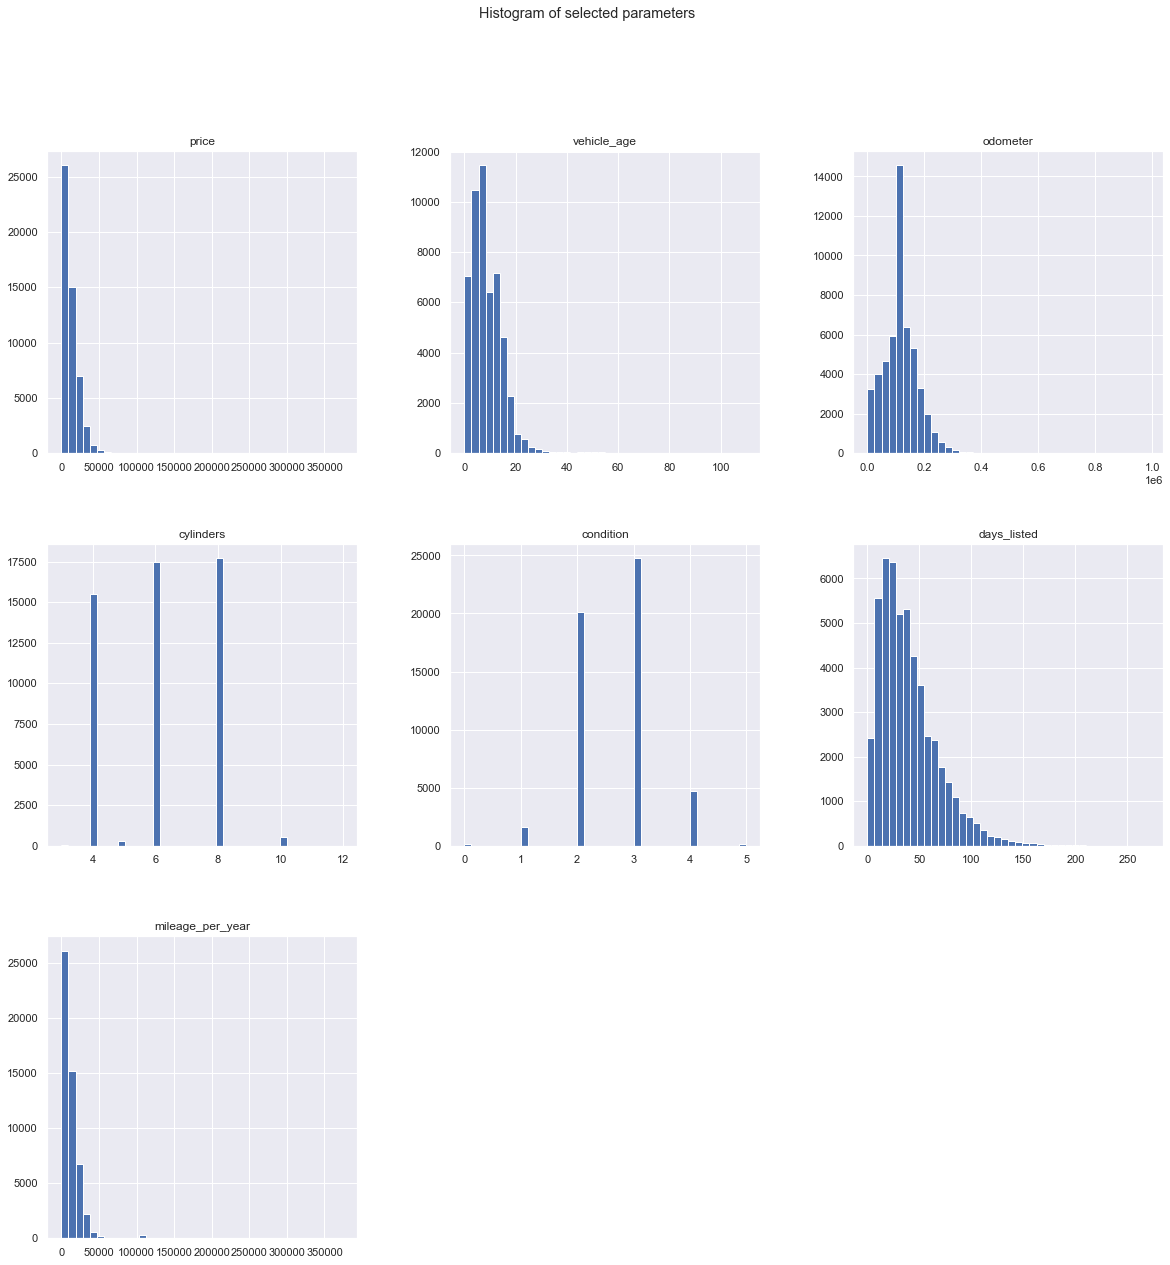

In [38]:
#distrubution plot of the data  
data[['price', 'vehicle_age', 'odometer', 'cylinders'
       , 'condition', 'days_listed', 'mileage_per_year']].hist(bins=40, figsize=(20,20))
plt.suptitle('Histogram of selected parameters')
plt.show()

- The histogram indicates that data in the price,age and mileage are right skewed. 
- Condition appears to have a normal distribution.
- By looking at the histogram, we can conclude that the data countains significant outlier in the price, odometer and vehicle age columns
- The vehicle age appears to have 3 peaks, vehicles with age around 0, 9 and 12. 
- Most vehicles are less than 30years




## Study and treat outliers



One approach to detecting outlier is to use the Z-score which is calculated by subtracting each value from the mean of the data and dividing it by the standard deviation. Data point whose Z-score fall out side the 3std on both sides are outliers. 

In [39]:
from scipy import stats

In [40]:
#z-score for price odometer and age
stats.zscore(data[['price','odometer','vehicle_age']])

array([[-0.27213874,  0.49509047, -0.24421077],
       [ 1.33133423, -0.44206059,  0.08335958],
       [-0.66055765, -0.08755962, -0.40799594],
       ...,
       [-0.81492928,  0.212089  ,  0.08335958],
       [-0.46585022,  0.40474641, -0.57178111],
       [-0.58088198, -0.06215608, -0.73556628]])

In [41]:
data_clean= data[(np.abs(stats.zscore(data[['price', 'vehicle_age', 'odometer']])) < 3).all(axis=1)]

In [42]:
#summary stats for data
data_clean.describe()

,price,model_year,condition,cylinders,odometer,days_listed,day_posted,month_posted,year_posted,vehicle_age,mileage_per_year
count,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000,50021.000000
mean,11688.906759,2010.094180,2.638112,6.085444,114531.676096,39.534476,3.002679,6.631135,2018.306731,8.212551,12272.548670
std,8590.230256,5.175708,0.704885,1.655427,55354.918535,28.217624,1.996316,3.472992,0.461141,5.190113,11683.289297
min,1.000000,1992.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2018.000000,0.000000,0.000000
25%,5000.000000,2007.000000,2.000000,4.000000,80836.000000,19.000000,1.000000,3.000000,2018.000000,4.000000,5000.000000
50%,8999.000000,2011.000000,3.000000,6.000000,111526.000000,33.000000,3.000000,7.000000,2018.000000,7.000000,8999.000000
75%,16400.000000,2014.000000,3.000000,8.000000,147621.000000,53.000000,5.000000,10.000000,2019.000000,12.000000,16000.000000
max,42000.000000,2019.000000,5.000000,12.000000,295010.000000,271.000000,6.000000,12.000000,2019.000000,26.000000,195700.000000


In [43]:
#percentage of data left for futher analysis
data_clean.shape[0]*100/data.shape[0]


97.08102862688015

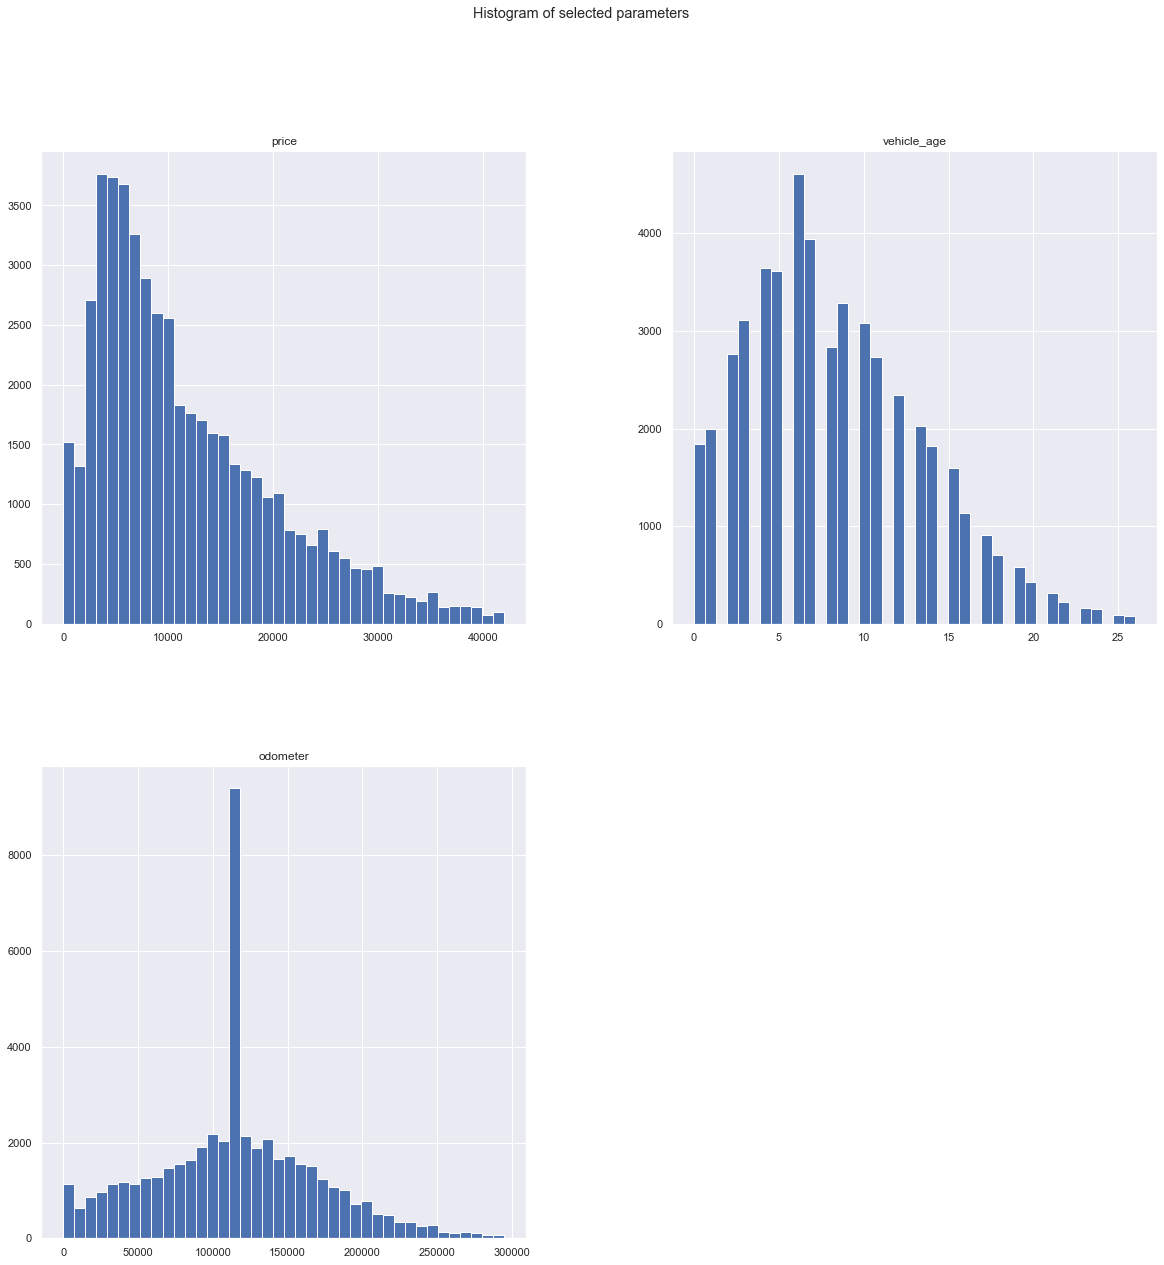

In [44]:
#distrubution plot of the clean data  
data_clean[['price', 'vehicle_age', 'odometer']].hist(bins=40, figsize=(20,20))
plt.suptitle('Histogram of selected parameters')
plt.show()

Using the z-score for filtering out the outlier works effectivly by converting the data to a normal distribution with a mean of 0 and std of 1 and filtering out data outside the 3rd standard deviation. As the 3rd standard deviation account for 99.7% of data in a normal distribution.

### Analyze days advertisements were listed before sale


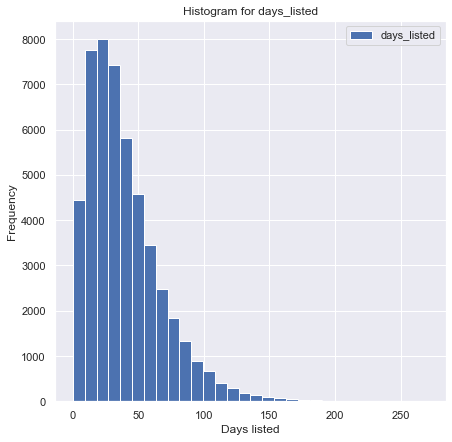

In [45]:
#histogram for ads lifetime
data_clean.plot(kind='hist',y='days_listed', bins=30, figsize=(7,7), grid=True)
plt.title("Histogram for days_listed")
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.show()

In [46]:
#median ad life
data_clean.days_listed.median()

33.0

In [47]:
#mean ad life
data_clean.days_listed.mean()

39.53447552028148

From the histogram we see that vehicles typically sell within 5-100 days. The median lifetime of an ad before the vehicle is sold is about 33 days. Vehicles that sell before the the 5th day is considerd quick sales while those that list for more then 200 days are unusally long. 

### Analyze ads by type of vehicle

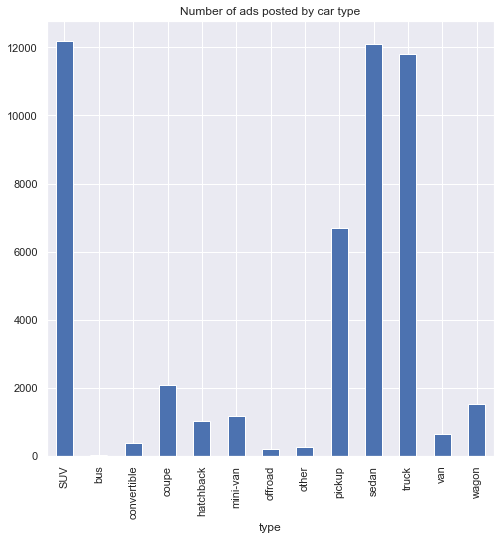

In [48]:
#number of ads posted for each car type
data_clean.groupby('type')['type'].count().plot(kind='bar',
                                                   figsize=(8,8), grid=True,
                                                   title='Number of ads posted by car type')
plt.show()

In [49]:
#average price of each car type
data_clean.groupby('type')['price'].mean().round(2)

type
SUV            10759.36
bus            17445.91
convertible    12681.16
coupe          13713.05
hatchback       6826.57
mini-van        8043.62
offroad        14364.26
other          10765.57
pickup         15706.53
sedan           6958.44
truck          15965.57
van            10517.51
wagon           9013.49
Name: price, dtype: float64

SUV Truck and Sedans had the highest number of ads. On average the most expensive type of vehicle is a Bus while the cheapest are hatchback and sedan

## Price factors

Perform a price factor analysis on the to 5 selling vehicles types by number.

In [50]:
data_top=data_clean[data_clean['type'].isin(['SUV', 'sedan','pickup', 'truck', 'coupe'])]

In [51]:
#correlation coefficients price and age
data_top['price'].corr(data_top['vehicle_age'])

-0.5325543487623207

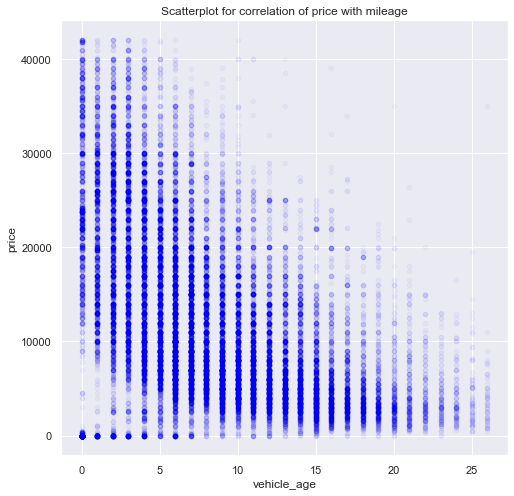

In [52]:
data_top.plot.scatter(x='vehicle_age', y='price', title='Scatterplot for correlation of price with mileage', figsize=(8, 8), alpha=0.03, color='blue')
plt.show()

From the scatterplot to check linear correlation of the price with vehicle's age. We can observe that price has a weak negative correlation with the age of the vehicle. The newer the vehicle the higher the chance that it'll cost more

In [53]:
#correlation coefficients price and mileage
data_top['price'].corr(data_top['odometer'])

-0.4133604677798725

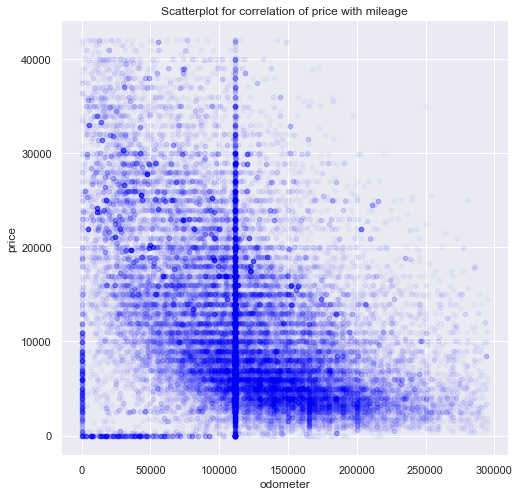

In [54]:
data_top.plot.scatter(x='odometer', y='price', title='Scatterplot for correlation of price with mileage', figsize=(8, 8), alpha=0.03, color='blue')
plt.show()

From the scatterplot to check linear correlation of the price with vehicle's age. We can observe that price has a weak negative correlation with the age of the vehicle. The lower the mileage the higher the chance that it'll cost more

In [55]:
data_top.groupby('condition')['condition'].count()

condition
0       98
1     1315
2    17572
3    21646
4     4138
5      101
Name: condition, dtype: int64

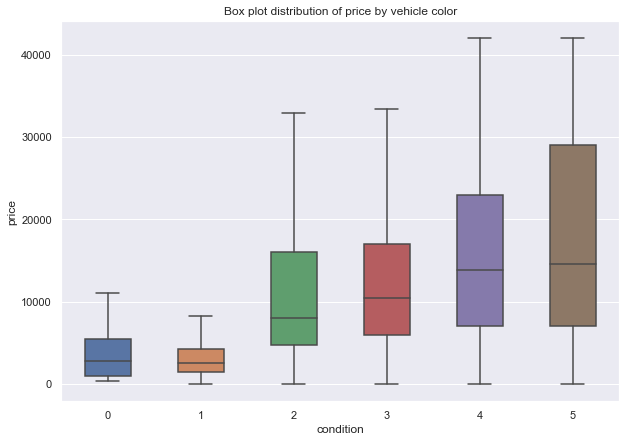

In [56]:
#distribution of car price by car color
fig = plt.subplots(figsize =(10, 7))
sns.boxplot(data=data_top,y='price', x='condition', width=.5, showfliers=False)
plt.title("Box plot distribution of price by vehicle color")
plt.show()

The better the condition of the car the higher the expected price of the car.

In [57]:

data_top.groupby('paint_color')['paint_color'].count()

paint_color
black     6757
blue      3765
brown     1045
custom     970
green     1128
grey      4428
orange     191
others    8062
purple      93
red       3809
silver    5471
white     8943
yellow     208
Name: paint_color, dtype: int64

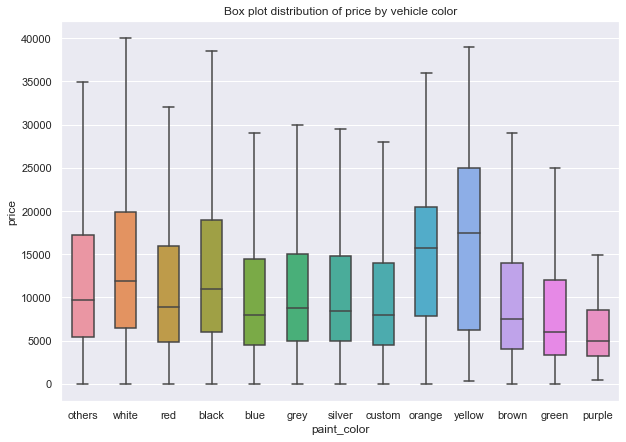

In [58]:
#distribution of car price by car color
fig = plt.subplots(figsize =(10, 7))
sns.boxplot(data=data_top,y='price', x='paint_color', width=.5, showfliers=False)
plt.title("Box plot distribution of price by vehicle color")
plt.show()

The color of the car doesn't seem to significantly affect the price.

In [59]:
data_top.groupby('transmission')['transmission'].count()

transmission
automatic    40957
manual        2200
other         1713
Name: transmission, dtype: int64

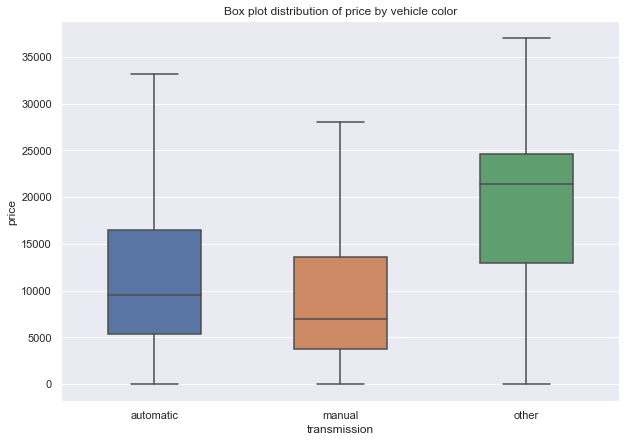

In [60]:
#distribution of car price by transmission
fig = plt.subplots(figsize =(10, 7))
sns.boxplot(data=data_top,y='price', x='transmission', width=.5, showfliers=False)
plt.title("Box plot distribution of price by vehicle color")
plt.show()

<div>
 <b>Conclusion</b> <br><br>
    Data processing:<br> 
    The model year is a logical predictor of a price of a vehicle and would be crucial to out study. The missing model year values were estimated based on the condition of the vehicle, using the median values. 
    Missing values in the odometer column was significant in porportion the missing values were estimated using the model year of the age of the Vehicle when posted. Missing values in paint color could be resulting from how data was collected. 
    The missing data might represent other color not mentioned or listed during data collection. Represent all missing data in paint color with 'others'. Missing data in the cylinder column was estimated from the cylinder for similar models. Outlier values were identified and dropped <br>    
    
    
Study/ observation: <br>
    Vehicles posted generally have a mileage between 0-250000miles. and sell within 0-250 days. The cars are also generally less than 30years old and with the majority of the car being about 9 years.  Vehicles that cost less than$10000 also made up for the largest portion of cars ads.
    SUV Truck and Sedans had the highest number of ads. On average the most expensive type of vehicle is a Bus while the cheapest are hatchback and sedan
    


Result: <br>
The color doesn't seem to affect the price of the car. The  mileage of the car appear to affect the price of the car but from the correlation coffient the it very little significance. The vehicle age and condition appear to be the most significant factors that affects the price of a vehicle: the newer the vehicle the higher the price and vice versa and the better the condition of the vehicle the higher the price
</div>